In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Solar/pulsar_stars1.csv")
dataF=data

In [ ]:
data[:2]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


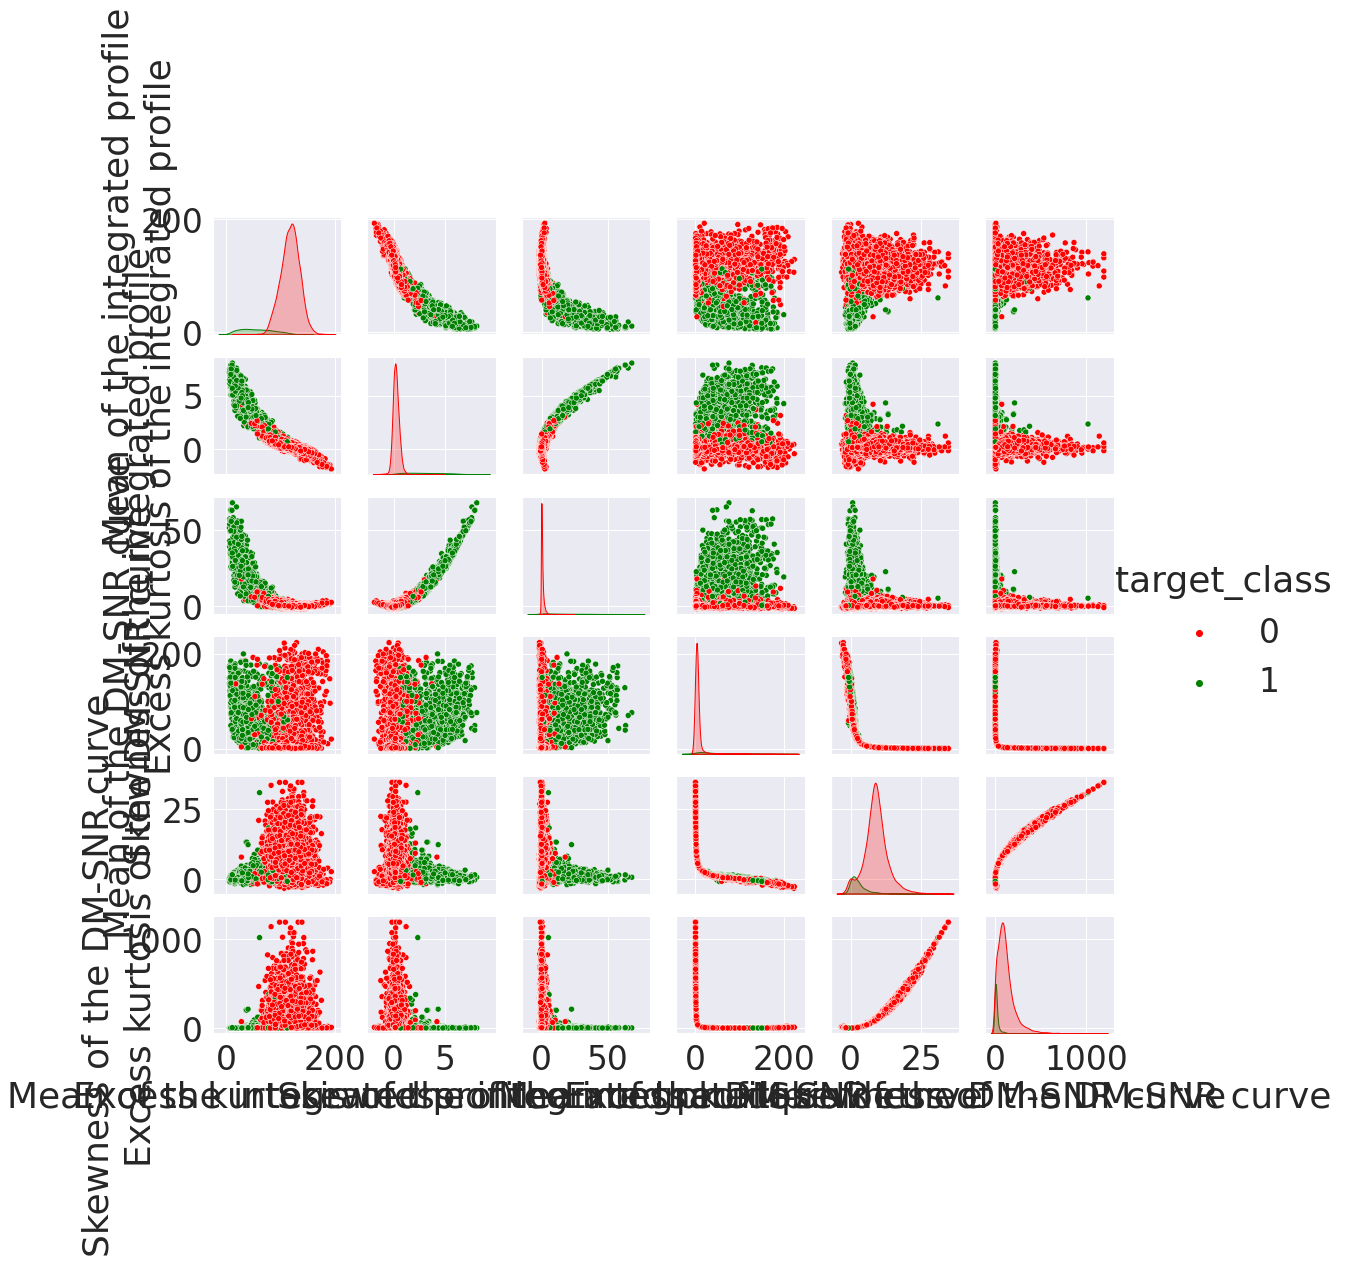

In [ ]:
sns.pairplot(data=data,
             palette=['red','green'],
             hue="target_class",
             vars=["Mean of the integrated profile",
                   "Excess kurtosis of the integrated profile",
                   "Skewness of the integrated profile",
                   "Mean of the DM-SNR curve",
                   "Excess kurtosis of the DM-SNR curve",
                   "Skewness of the DM-SNR curve"])

plt.suptitle(" ",fontsize=16)
#Pair Plot of HTRU2 Dataset
plt.tight_layout()
plt.show() 

In [ ]:
ddf = dataF.drop(dataF.columns[[8]], axis=1)

In [ ]:
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ddf,data["target_class"],test_size=0.20, random_state=200,shuffle=True)

In [ ]:
from collections import Counter
Counter(y_test)

Counter({0: 3259, 1: 321})

In [ ]:
>>> from collections import Counter
>>> from sklearn.datasets import make_classification
>>> from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE
ada = ADASYN(ratio='all')
>>> A1, A2 = ada.fit_resample(X_train, y_train)
>>> print('Resampled dataset shape %s' % Counter(A2))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({1: 13010, 0: 13000})


In [ ]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
S1, S2 = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(S1.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(S2.shape))
Counter(S2)


After OverSampling, the shape of train_X: (26000, 8)
After OverSampling, the shape of train_y: (26000,) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 13000, 1: 13000})

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
C1, C2 = cc.fit_resample(X_train, y_train)
print(sorted(Counter(C2).items()))

[(0, 1318), (1, 1318)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X=np.concatenate((A1,S1,C1),axis=0)
y=np.concatenate((A2,S2,C2),axis=0)

In [ ]:
from imblearn.over_sampling import SMOTE
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (14318, 8)
Number transactions y_train dataset:  (14318,)
Number transactions X_test dataset:  (3580, 8)
Number transactions y_test dataset:  (3580,)


In [ ]:
X.shape

(47854, 8)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data

model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y,
          epochs=100,
          batch_size=128)
score = model.evaluate(X_test, y_test, batch_size=128)

In [ ]:
>>> from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import SGDClassifier
rfc = RandomForestClassifier(n_estimators=300, random_state=2,max_depth=10) 
vc = VotingClassifier(estimators=[('rfc', rfc),('etc1',etc1)],voting='hard', weights=[0.2,0.7])

from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=42, shuffle=False)
scores = cross_val_score(vc, X, y, cv=10)
scores

In [ ]:
>>> print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.02)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(128,),alpha=1, max_iter=1000,learning_rate="adaptive")
etc_pred1 = mlp.fit(C1, C2)
y_pred_class=etc_pred1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class)
print('F1 score: %f' % f1)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(128,),alpha=1, max_iter=1000,learning_rate="adaptive")
etc_pred1 = mlp.fit(A1, A2)
y_pred_class=etc_pred1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class)
print('F1 score: %f' % f1)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(128,),alpha=1, max_iter=1000,learning_rate="adaptive")
etc_pred1 = mlp.fit(S1, S2)
y_pred_class=etc_pred1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class)
print('F1 score: %f' % f1)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(128,),alpha=1, max_iter=1000,learning_rate="adaptive")
etc_pred1 = mlp.fit(A1, A2)
y_pred_class=etc_pred1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class)
print('F1 score: %f' % f1)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(128,),alpha=1, max_iter=1000,learning_rate="adaptive")
etc_pred1 = mlp.fit(X, y)
y_pred_class=etc_pred1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_class)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_class)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_class)
print('F1 score: %f' % f1)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
a = GradientBoostingClassifier(max_depth=8, learning_rate=0.1, n_estimators=50, random_state=2)
print("GBM")
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
a = GradientBoostingClassifier(max_depth=8, learning_rate=0.1, n_estimators=50, random_state=2)
print("GBM")
a_pred = a.fit(A1, A2)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
a = GradientBoostingClassifier(max_depth=8, learning_rate=0.1, n_estimators=50, random_state=2)
print("GBM")
a_pred = a.fit(S1, S2)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
a = GradientBoostingClassifier(max_depth=8, learning_rate=0.1, n_estimators=50, random_state=2)
print("GBM")
a_pred = a.fit(C1, C2)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
a = GradientBoostingClassifier(max_depth=15, learning_rate=0.2, n_estimators=300, random_state=2)
print("GBM")
a_pred = a.fit(X, y)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
etc1 = ExtraTreesClassifier(n_estimators=250, random_state=6)
etc_pred1 = etc1.fit(X_train, y_train)
epred1=etc_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
etc1 = ExtraTreesClassifier(n_estimators=250, random_state=6, max_depth=15)
etc_pred1 = etc1.fit(X, y)
epred1=etc_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
etc1 = ExtraTreesClassifier(n_estimators=250, random_state=6)
etc_pred1 = etc1.fit(S1, S2)
epred1=etc_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
etc1 = ExtraTreesClassifier(n_estimators=250, random_state=6)
etc_pred1 = etc1.fit(A1, A2)
epred1=etc_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
etc1 = ExtraTreesClassifier(n_estimators=250, random_state=6)
etc_pred1 = etc1.fit(C1, C2)
epred1=etc_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2,max_depth=150) 

rfc_pred1 = rfcPred.fit(C1, C2)
epred1=rfc_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2,max_depth=150) 
rfc_pred1 = rfcPred.fit(A1, A2)
epred1=rfc_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2,max_depth=150) 

rfc_pred1 = rfcPred.fit(S1, S2)
epred1=rfc_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2,max_depth=150) 

rfc_pred1 = rfcPred.fit(X_train, y_train)
epred1=rfc_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2,max_depth=150) 

rfc_pred1 = rfcPred.fit(X, y)
epred1=rfc_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="liblinear", multi_class="ovr")
lr_pred1 = lr.fit(X, y)
epred1=lr_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="liblinear", multi_class="ovr")
lr_pred1 = lr.fit(A1, A2)
epred1=lr_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="liblinear", multi_class="ovr")
lr_pred1 = lr.fit(S1, S2)
epred1=lr_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="liblinear", multi_class="ovr")
lr_pred1 = lr.fit(C1, C2)
epred1=lr_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="liblinear", multi_class="ovr")
lr_pred1 = lr.fit(X_train, y_train)
epred1=lr_pred1.predict(X_test)
print(accuracy_score(y_test,epred1))
print(classification_report(y_test,epred1))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
lr=LogisticRegression()
from sklearn.linear_model import SGDClassifier
rfc = RandomForestClassifier(n_estimators=300, random_state=2,max_depth=50) 
a = GradientBoostingClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, random_state=52)
etc = ExtraTreesClassifier(n_estimators=200, random_state=5)
#svm=SVC(probability=True)
#vc = VotingClassifier(estimators=[('rfc', rfc),('a',a)],voting='soft')
vc2 = VotingClassifier(estimators=[('rfc', rfc),('a',a),('etc',etc)],voting='hard')
vc2.fit(X_train,y_train)
y_preh = vc2.predict(X_test)
h=accuracy_score(y_test, y_preh)
#print(classification_report(y_test, y_pre))
h

In [ ]:
ans=a_pred.predict(value)
ans1=etc_pred1.predict(value)
ans2=rfcPred.predict(value)
print(ans)
print(ans1)
print(ans2)
ans3=vc2.predict(value)
print(ans3)
vc1.predict(value)

In [ ]:
y_test[9]

In [ ]:
value=X_test[9]
value=value.reshape(1, -1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
lr=LogisticRegression()
from sklearn.linear_model import SGDClassifier
rfc = RandomForestClassifier(n_estimators=300, random_state=2,max_depth=10) 
a = GradientBoostingClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, random_state=52)
etc = ExtraTreesClassifier(n_estimators=200, random_state=5)
#svm=SVC(probability=True)
#vc = VotingClassifier(estimators=[('rfc', rfc),('a',a)],voting='soft')
vc1 = VotingClassifier(estimators=[('rfc', rfc),('a',a),('etc',etc)],voting='soft')
vc1.fit(X_train,y_train)
y_pres = vc1.predict(X_test)
s=accuracy_score(y_test, y_pres)
#print(classification_report(y_test, y_pre))
s

In [ ]:
ans=a_pred.predict_proba(value)
ans1=etc_pred1.predict_proba(value)
ans2=rfcPred.predict_proba(value)
print(ans)
print(ans1)
print(ans2)
ans3=vc1.predict_proba(value)
print(ans3)
vc1.predict(value)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
lr=LogisticRegression()
from sklearn.linear_model import SGDClassifier
rfc = RandomForestClassifier(n_estimators=300, random_state=2,max_depth=10) 
a = GradientBoostingClassifier(max_depth=10, learning_rate=0.2, n_estimators=50, random_state=52)


vc = VotingClassifier(estimators=[('vc1', vc1),('vc2',vc2)],voting='hard', weights=[0.2,0.7])

vc.fit(X_train,y_train)
y_pre = vc.predict(X_test)
sh=accuracy_score(y_test, y_pre)
#print(classification_report(y_test, y_pre))
sh

In [ ]:
ans=a_pred.predict(value)
ans1=etc_pred1.predict(value)
ans2=rfcPred.predict(value)
print(ans)
print(ans1)
print(ans2)
ans3=vc.predict(value)
print(ans3)
vc1.predict(value)

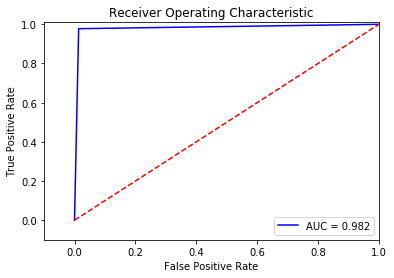

In [ ]:
#tmp = rfc.fit(X_train, y_train.ravel())
y_pred_sample_score = vc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pre)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pre)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pre)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pre)
print('F1 score: %f' % f1)

Accuracy: 0.982062
Precision: 0.986392
Recall: 0.977723
F1 score: 0.982038


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type):
    
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    pred=predictions
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
        
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    plt.savefig('gbm.png')
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)

In [ ]:
i=1
def plot_sub_sentiment(Airline,A):
    #tmp = rfc.fit(X_train, y_train.ravel())
    y_pred_sample_score = Airline.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
    roc_auc = auc(fpr,tpr)
    
    # Plot RO
    plt.title('ROC curve of '+A)
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
   
plt.figure(1,figsize=(8, 10),dpi=300)
plt.subplot(221)
plot_sub_sentiment(a_pred,'GBC')
plt.subplot(222)
plot_sub_sentiment(etc_pred,'ETC')
plt.subplot(223)
plot_sub_sentiment(rfcPred,'RF')
plt.subplot(224)
plot_sub_sentiment(etc_pred1,'RTB-VC')

plt.savefig('ROC.png')

In [ ]:
i=1
def plot_sub_sentiment(Airline,A):
    #tmp = rfc.fit(X_train, y_train.ravel())
    y_pred_sample_score = Airline.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred_sample_score),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.xlabel('')
    plt.title(A +" CONFUSION MATRIX",fontsize=20)
   
plt.figure(1,figsize=(10, 10),dpi=200)
plt.subplot(221)
plot_sub_sentiment(a_pred,'GBC')
plt.subplot(222)
plot_sub_sentiment(etc_pred,'ETC')
plt.subplot(223)
plot_sub_sentiment(rfcPred,'RF')
plt.subplot(224)
plot_sub_sentiment(etc_pred1,'RTB-VC ')

plt.savefig('confusion1.png')

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
clf = SGDClassifier(loss='log')
lr=LogisticRegression()

Classifiers = [
    CalibratedClassifierCV(clf, cv=5, method='isotonic'),
    VotingClassifier(estimators=[('lr', lr), ('clf', clf),],voting='hard'),
    LogisticRegression( solver='liblinear',multi_class='ovr',C=3.0),
    ExtraTreesClassifier(n_estimators=500, random_state=5),
    SVC(kernel='linear', C=2.0, random_state=500),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200,max_depth=100),
    GradientBoostingClassifier(max_depth=100, learning_rate=0.1, n_estimators=50, random_state=52),
    AdaBoostClassifier(n_estimators=100, random_state=5),
    GaussianNB(),
    linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
]

In [ ]:
Accuracy=[]
Model=[]
for classifier in Classifiers:
    fit = classifier.fit(X_train,y_train)
    pred = fit.predict(X_test)
   
    #print(classification_report(pred,y_test))
    accuracy = accuracy_score(y_test, y_pred_class)
    print('Accuracy:',classifier.__class__.__name__, accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred_class)
    print('Precision: ',classifier.__class__.__name__, precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred_class)
    print('Recall:' ,classifier.__class__.__name__,recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred_class)
    print('F1 score:' ,classifier.__class__.__name__,f1)  
    print("==========================================")

In [ ]:
Accuracy=[]
Model=[]
for classifier in Classifiers:
    fit = classifier.fit(X_train,y_train)
    y_pred_class = fit.predict(X_test)
    #print(classification_report(pred,y_test))
    accuracy = accuracy_score(y_test, y_pred_class)
    print('Accuracy:',classifier.__class__.__name__, accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, y_pred_class)
    print('Precision: ',classifier.__class__.__name__, precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, y_pred_class)
    print('Recall:' ,classifier.__class__.__name__,recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, y_pred_class)
    print('F1 score:' ,classifier.__class__.__name__,f1)  
    print("==========================================")